<a href="https://colab.research.google.com/github/EirafWali/GEOL558-unsupervised-corals/blob/main/Unsupervised_corals_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML: Corals dataset for coral clustering.
#### By: Eiraf Wali Dawoud
##### 1/26/2025

---

#### Summary:
The dataset contains different environmental factors, such as salinity, temperatures, latitude, longitude, and information like coral presence and silt/sulfide levels. These features reflect the environmental conditions that shape the coral ecosystems globally. This notebook looks into these features especially the salinity and temperature, to see if there are any favorable conditions for coral habitats. This is done by scaling the dataset and performing unsupervised clustering methods: the k-mean, DBSCAN, and Gaussian Mixture Model. The scoring method is the Silhouette scoring method. The final results show a similar cluster value (eight). All three methods show the same cluster number, which gives more confidence that coral presence can depend on eight environmental conditions. These eight clusters divide the globe's seas by their salinity and seasonal temperature. The results show that corals favor warmer and saltier environments. In contrast, clusters at higher latitudes, colder waters, and less saline conditions tend to have less abundance of corals. Lastly, anomalies in the clusters indicate that some corals can adapt to harsher environmental conditions. The insights from this study can aid in prioritizing regions for coral protection and/or coral building projects.

---
#### Dataset Source:
https://www.kaggle.com/code/artemborzenko/distribution-of-coral-reefs/notebook

The dataset can be found in:

https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv

---
#### Objective:
This study will look into different clustering methods using salinity and temperature data for corals. This will help in understanding the favored environments for corals' habitats worldwide.

#### Importance:
This study can help marine scientists and geoscientists understand coral colonies' behaviors in relation to different oceanic environmental factors.

#### Clustering Methods:
- K-mean clustering
- DBSCAN
- GMM


### This notebook loads, cleans, understands, and visualizes the dataset before applying the unsupervised ML.

---


## Section 1: Import and clean the dataset

In [1]:
# install basemap for mapping
!pip install basemap

In [2]:
# Import the needed libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from sklearn.mixture import GaussianMixture

In [3]:
# Reading the data from github for easy access by the public

# file path from github repo:
file_path = "https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv"

#read the csv
df_corals = pd.read_csv(file_path)

# Display the header of the datarame with the first 5 rows
df_corals.head()

name   salinity  January_temp  June_temp    area  latitude  \
0  Adriatic Sea  38.298527     15.658799  20.855299  138000        43   
1  Adriatic Sea  38.304909     16.297098  19.501200  138000        43   
2  Adriatic Sea  38.462040     16.251598  19.028500  138000        43   
3  Adriatic Sea  38.121601     15.709500  22.882999  138000        43   
4  Adriatic Sea  38.519196     15.733400  21.824799  138000        43   

   longitude  type of sea  corals  silt/sulfide  
0         15            2       1             0  
1         15            2       1             0  
2         15            2       1             0  
3         15            2       1             0  
4         15            2       1             0

In [4]:
# In this code box are some Exploratory Data Analyses (EDAs) of the dataset and printing of the results.

# Understanding basic information about the dataset
print('Below are some general information on the dataset:')
print(df_corals.info())

# Looking into some statistics
print('The following information are some statistical overview:')
print(df_corals.describe())

# Check the size of the dataset by the shape to see if it fulfills the assignment requirement
print('The size of this dataset is:',df_corals.shape, 'rows and columns respectively')

Below are some general information on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2451 non-null   object 
 1   salinity      2451 non-null   float64
 2   January_temp  2451 non-null   float64
 3   June_temp     2451 non-null   float64
 4   area          2451 non-null   int64  
 5   latitude      2451 non-null   int64  
 6   longitude     2451 non-null   int64  
 7   type of sea   2451 non-null   int64  
 8   corals        2451 non-null   int64  
 9   silt/sulfide  2451 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.6+ KB
None
The following information are some statistical overview:
          salinity  January_temp    June_temp          area     latitude  \
count  2451.000000   2451.000000  2451.000000  2.451000e+03  2451.000000   
mean     32.819880     18.026784    21.612658  1

Note: From the description and analysis above, we can see that we have a total of 2451 rows and 10 columns. Which satisfies the requirements of the assignment. We can see that the mean salinity and January temperature are 32 parts per thousand and 18 degrees Celsius, respectively. 75% of the salinity records are approximately 36 parts per thousand. At the same time, 75% of the recorded January temperatures are approximately 28 degrees Celsius.

In [5]:
# This code box looks into the data and checks if there are any missing values in all the columns.

# Looking for missing values and giving the sum in each column
missing_data = df_corals.isnull().sum()
print(missing_data)

name            0
salinity        0
January_temp    0
June_temp       0
area            0
latitude        0
longitude       0
type of sea     0
corals          0
silt/sulfide    0
dtype: int64


Note:

Luckily, the CSV containing the data has no missing values in any columns and rows.

The data is clean and ready to work with directly.

## Section 2: Visualization

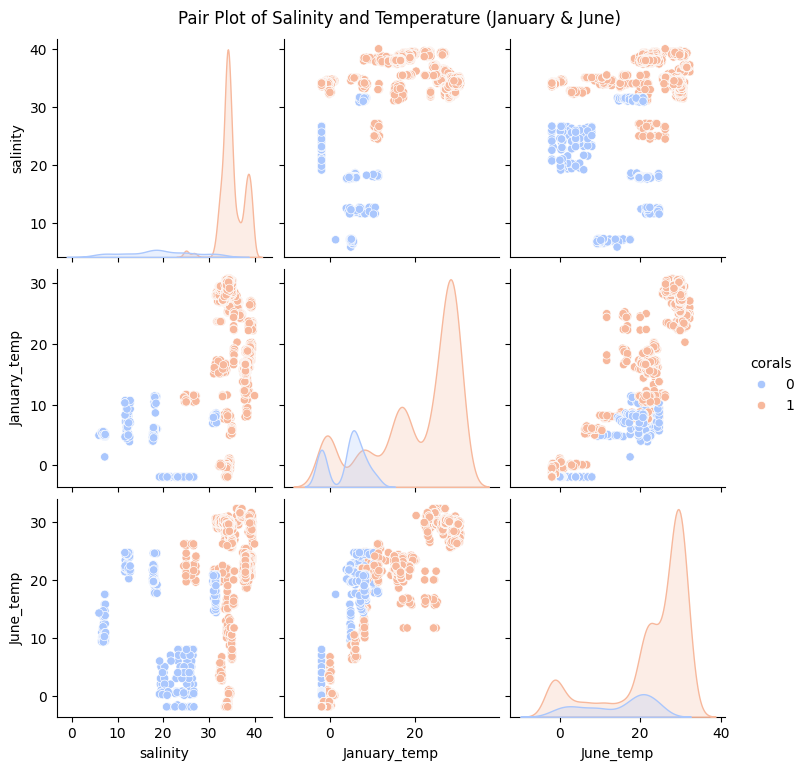

In [8]:
# In this code box is a Seaborn pair plot using the seaborn library to understand the salinity and temperature in both months (January and June)
# Figure 1:

# Create the pair plot using seaborn
sns.pairplot(
    df_corals,
    vars=['salinity', 'January_temp', 'June_temp'],  # Select the needed variables for the plot
    hue='corals',  # Color points by the 'corals' column (present or not present)
    palette='coolwarm'
)

# Add a title to the plot
plt.suptitle("Pair Plot of Salinity and Temperature (January & June)", y=1.02)

# Display the plot
plt.show()

## Figure 1: Pair plot for salinity and temperature in January and June.

In the pair plot, we can visualize some clusters as 0 and 1, which in our dataset means corals are present or non-present.

Additionally, we can see that most of the points of present corals (orange color) are clustered at the range of salinity (25 to 40) parts per thousand.

The temperatures in both months vary from 0 to 40 degrees Celsius, which does not give any clear conclusion to the analysis.

Next is a correlation matrix heat map for the dataset to help understand the relationship between the dataset parameters.

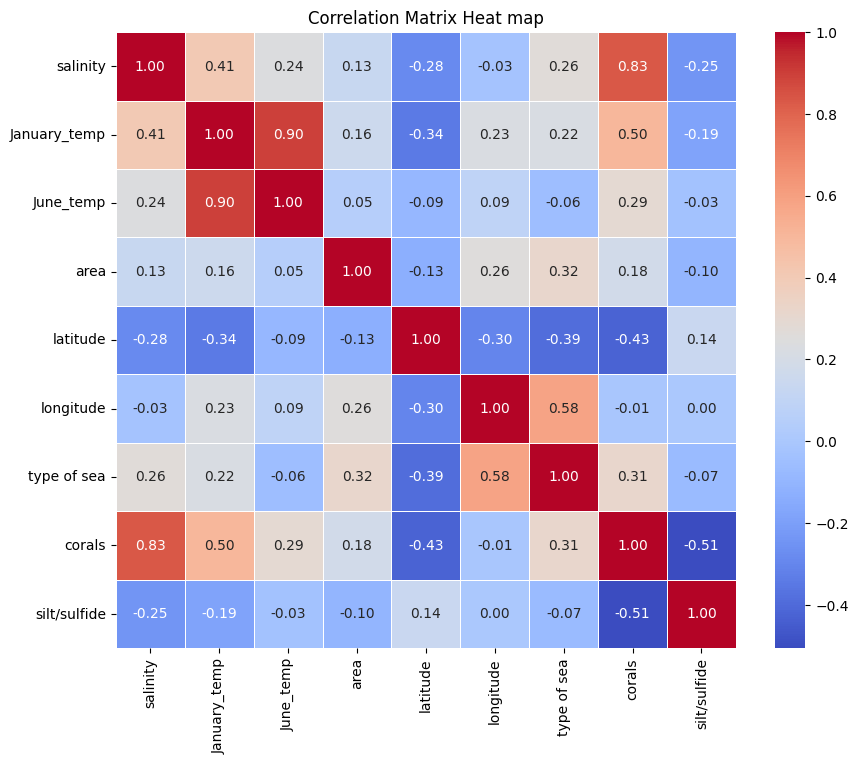

In [9]:
# This code box is to plot a correlation matrix heat map of the dataset
# Figure 2:

# Correlation matrix for numeric columns only
correlation_matrix = df_corals.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap='coolwarm',
    fmt='.2f',  # Numbers format
    linewidths=0.5  # Line width between cells
)

# Add a title
plt.title("Correlation Matrix Heat map")

# Display the plot
plt.show()

## Figure 2: Correlation Matrix Heat Map

### Observations:

Salinity:

- High correlation with coral presence (0.83):

 - It shows a strong positive correlation, suggesting that areas with higher salinity levels are more likely to have coral presence.

- Moderate correlation with January_temp (0.41):
 - Shows that salinity increases at January temperatures.

- Weak correlation with June_temp (0.24):
 - There is little relationship between salinity and summer temperatures.


January Temperature:
- Moderate correlation with Coral Presence (0.50):
 - Shows that higher temperatures in January might positively influence coral presence.

June Temperature:
- Weak correlation with Coral Presence (0.29):
 - Shows a weaker relationship with corals compared to January temperatures.

Coral Presence:
- Strong influence by salinity (0.83) and moderate influence by January_temp (0.50):
 - Shows that salinity plays a bigger role in coral presence.
- Negative influence by Silt/Sulfide (-0.51):
 - Shows areas with high silt and sulfide content would have fewer corals.
- Negative influence by the latitude (-0.43):
 - indicates that corals do not favor the high cold areas.



#### Now, let us look into salinity variation in areas with corals present and with areas of absent corals.

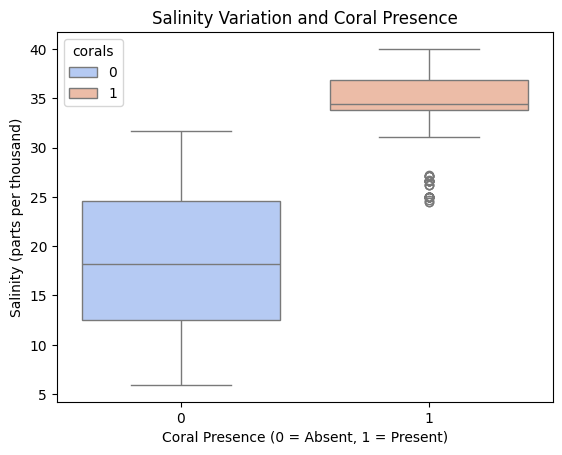

In [12]:
# This code box is to plot a box plot to see the salinity variations with corals' presence.
# Figure 3:

# Plot the box plot
sns.boxplot(data=df_corals,
            x='corals', y='salinity',
            hue='corals',                # color it by the corals presence
            palette='coolwarm'
            )

# Add title and labels
plt.title("Salinity Variation and Coral Presence")
plt.xlabel("Coral Presence (0 = Absent, 1 = Present)")
plt.ylabel("Salinity (parts per thousand)")

# Display the plot
plt.show()

## Figure 3: Salinity Variation by Coral Presence (Box Plot)

### Observations:

- The median salinity for areas with coral presence is higher than the areas with coral absence.
This can mean that corals tend to thrive in saltier environments.

- In areas with the presence of corals, the interquartile range seems to be narrower, which means that corals thrive within a specific salinity range.
On the other hand, areas with an absence of corals tend to have a wider salinity range, showing more variability.

- There are outliers in the salinity of areas of present corals, representing that some corals can adapt to lower salinity ranges.

In [15]:
# This code box is to look into the salinity thresholds for coral presence
# Calculate the min, max, and interquartile range (IQR) for salinity in coral-present regions

# Filter the data for only the coral-present areas (corals = 1)
coral_present_salinity = df_corals[df_corals['corals'] == 1]['salinity']

# Calculate some salinity statistics
salinity_stats = {
    "Minimum salinity for coral presence": coral_present_salinity.min(),
    "25th Percentile": coral_present_salinity.quantile(0.25),
    "Median salinity for coral presence": coral_present_salinity.median(),
    "75th Percentile": coral_present_salinity.quantile(0.75),
    "Maximum salinity for coral presence": coral_present_salinity.max(),
}

# Display the results of the statistics
salinity_stats

{'Minimum salinity for coral presence': 24.4971199,
 '25th Percentile': 33.790344239999996,
 'Median salinity for coral presence': 34.460935594999995,
 '75th Percentile': 36.89338303,
 'Maximum salinity for coral presence': 40.0}

In [16]:
# Print the coral-friendly salinity range based on the previous code
print('Most coral-friendly areas have a salinity that is within:',
      f"{coral_present_salinity.quantile(0.25):.2f}",
      'parts per thousand and',
      f"{coral_present_salinity.quantile(0.75):.2f}",'parts per thousand.')


Most coral-friendly areas have a salinity that is within: 33.79 parts per thousand and 36.89 parts per thousand.


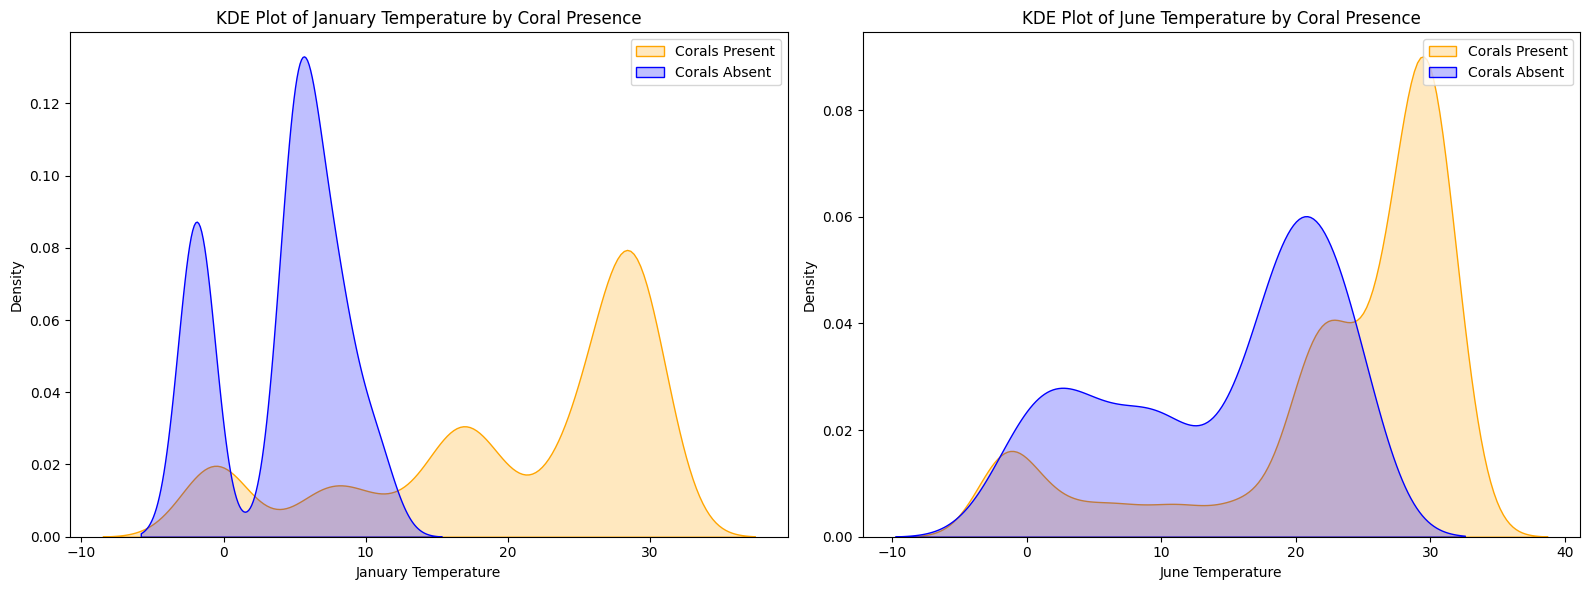

In [17]:
# This code box is to plot 2 KDE plots for the coral presence in both months' temperatures
# Figure 4:

# Initiate the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for January Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='January_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[0]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='January_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[0]
)

# Add title, labels, and legend
axes[0].set_title("KDE Plot of January Temperature by Coral Presence")
axes[0].set_xlabel("January Temperature")
axes[0].set_ylabel("Density")
axes[0].legend()

# KDE plot for June Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='June_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[1]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='June_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[1]
)

# Add title, labels, and legend
axes[1].set_title("KDE Plot of June Temperature by Coral Presence")
axes[1].set_xlabel("June Temperature")
axes[1].legend()

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

## Figure 4: KDE Plots

### Observations:
The KDE plots show the distribution of temperatures in January on the left and June on the right for areas with coral presence in orange and absence in blue.

In January, present corals show a higher peak around 25–30°C, while absent corals show peaks at cooler temperatures (around 0–10°C), which indicates corals' preference for warmer temperatures.

Similarly, in June, corals favor higher temperatures near 25–30°C, while the absence of corals shows a broad distribution across cooler ranges.

In [22]:
# Figure 5: Interactive folium map with the locations of corals presence and absence
# The size of the points represents January's temperature.

# Calculate the map center based on the entire dataset
map_center = [df_corals['latitude'].mean(), df_corals['longitude'].mean()]

# To change the map to English labels (my settings show Arabic; hence, I have to change it to English)
m = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Define colors for presence and absence
def get_color(corals):
    return 'green' if corals == 1 else 'red'

# Add markers for all locations and color them based on coral presence
for _, row in df_corals.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['January_temp'] / 5,  # Scale size by January temperature
        color=get_color(row['corals']),
        fill=True,
        fill_color=get_color(row['corals']),
        fill_opacity=0.7,
        tooltip=f"January_temp: {row['January_temp']}",  # Show salinity value on hover
    ).add_to(m)

# Display the map
m

## Figure 5: Interactive folium map with the locations of corals presence

We can note that corals are primarily clustered in the Adriatic, Red, Mediterranean, Molucca, and Mozambique Channel.

The size of the points represents the temperature in January. Which shows that most corals favor temperatures of approximately 28 degrees Celcius, which is consistent with the analysis done previously.

In [21]:
# Figure 6: Interactive folium map with the locations of corals presence and absence
# The size of the points represents the salinity.

# Calculate the map center based on the entire dataset
map_center = [df_corals['latitude'].mean(), df_corals['longitude'].mean()]

# To change the map to English labels (my settings show Arabic; hence, I have to change it to English)
m = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Define colors for presence and absence
def get_color(corals):
    return 'green' if corals == 1 else 'red'

# Add markers for all locations and color them based on coral presence
for _, row in df_corals.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['salinity'] / 5,  # Scale size by salinity
        color=get_color(row['corals']),
        fill=True,
        fill_color=get_color(row['corals']),
        fill_opacity=0.7,
        tooltip=f"Salinity: {row['salinity']}",  # Show salinity value on hover
    ).add_to(m)
# Display the map
m


## Figure 6: Interactive folium map with the locations of corals presence

We can note that corals are primarily clustered in the Adriatic, Red, Mediterranean, Molucca, and Mozambique Channel.

The size of the points represents the salinity, which shows that most corals favor saltier oceans with approximately 33 parts per thousand, consistent with the previous analysis.

## Section 3: Pre-processing and Scaling

###  Z-Score Normalization

The following section is for normalizing the dataset using the Z-score normalization method.

### How does it work?
The normalization method I am using is z-normalization (also called standardization), where each feature is scaled to have a mean of 0 and a standard deviation of 1

### Why am I scaling?
I am scaling before performing the clustering, as the K-mean is sensitive to Euclidean Distances. This means that the clustering is sensitive to the scale of features because it uses Euclidean distance for calculations. Z-normalization ensures that all features contribute equally regardless of their original scale.

In [24]:
# This code box is dedicated to scaling the data by Z-score normalization

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
# The (fit) method calculates the mean and standard deviation for each column
# The (transform) method performs the Z-Score transformation to standardize the data
standardized_data = scaler.fit_transform(df_corals[['salinity', 'January_temp', 'June_temp']])

# Convert the standardized data back into a DataFrame for easier use and visualization
standardized_df = pd.DataFrame(standardized_data, columns=['salinity', 'January_temp', 'June_temp'])

# Display the first few rows of the standardized DataFrame
print(standardized_df.head())

# Explanation:
# 1. Each column in `standardized_df` now has a mean of 0 and a standard deviation of 1.
# 2. This ensures that all features contribute equally to the clustering or PCA.


   salinity  January_temp  June_temp
0  0.827098     -0.213955  -0.075035
1  0.828062     -0.156283  -0.209192
2  0.851783     -0.160394  -0.256024
3  0.800388     -0.209374   0.125859
4  0.860412     -0.207215   0.021018


## Section 4: K-mean Clustering and Silhouette scoring:




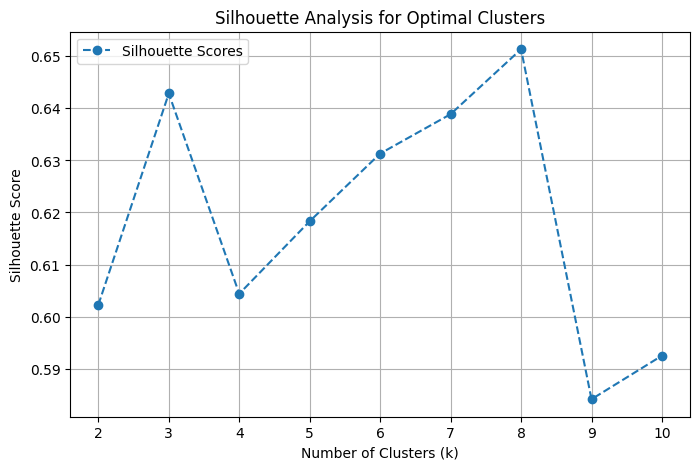

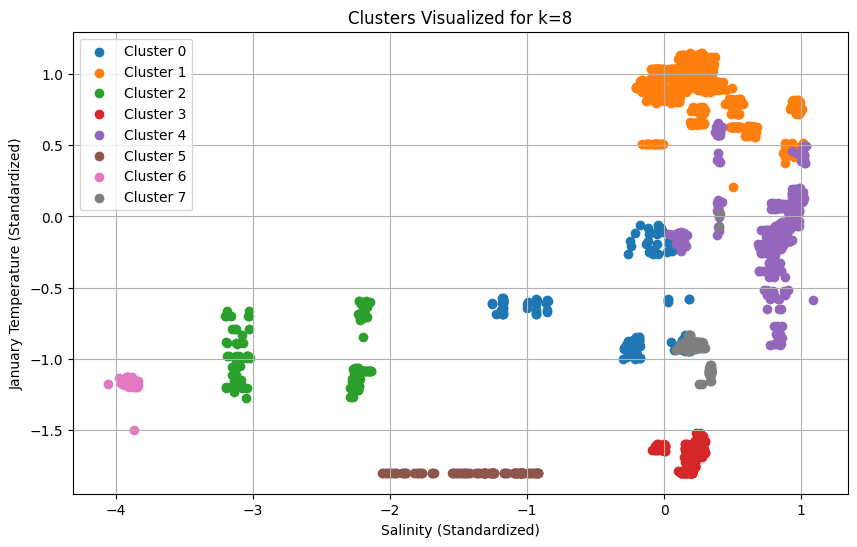

The optimal clusters number is: 8


In [29]:
# This code box is dedicated to performing k-mean clustering and silhouette scoring.
# Figures 7 & 8: Silhouette scores and k-mean clusters

# Initialize the range of clusters from 2 to 10.
range_clusters = range(2, 11)
# Initialize the silhouette score variables
silhouette_scores = []

# Loop to calculate the k-mean with the chosen range
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(standardized_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(standardized_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the silhouette scores
optimal_k = range_clusters[silhouette_scores.index(max(silhouette_scores))]

# Apply K-Means clustering with the resulted number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
kmeans_optimal.fit(standardized_df)
standardized_df['Cluster'] = kmeans_optimal.labels_

# Plot the silhouette scores to evaluate the cluster
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', label='Silhouette Scores')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot clusters for visualization
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = standardized_df[standardized_df['Cluster'] == cluster]
    plt.scatter(cluster_data['salinity'], cluster_data['January_temp'], label=f'Cluster {cluster}')

plt.title(f'Clusters Visualized for k={optimal_k}')
plt.xlabel('Salinity (Standardized)')
plt.ylabel('January Temperature (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

# print the optimal clusters number
print ('The optimal clusters number is:',optimal_k)

### Figures 7 & 8: Silhouette scores and k-mean clusters:

Figure 7: The silhouette scores plot shows that this dataset's optimal number of clusters is 8.

Figure 8: The scatter plot at the bottom shows the clustering of the data points based on standardized salinity and January temperature. Each cluster represents a group with similar characteristics in these features.

To put more context to this result, The two codes below will look into the statistics and create a map to visualize the global coral presence and cluster distribution.

In [30]:
# This code looks into the statistics of the clusters for better quantifying and understanding.

# Calculate cluster statistics
cluster_details = standardized_df.groupby('Cluster').agg(['mean', 'std', 'count'])

# Reset the index for better readability
cluster_details = cluster_details.reset_index()

# Display the cluster details
cluster_details

Cluster  salinity                 January_temp                 June_temp  \
               mean       std count         mean       std count      mean   
0       0 -0.351231  0.478902   154    -0.692097  0.276568   154 -0.102738   
1       1  0.262671  0.262429  1156     0.904304  0.162864  1156  0.764904   
2       2 -2.522054  0.421737   147    -1.015528  0.194880   147  0.012084   
3       3  0.155138  0.097639   244    -1.681510  0.075090   244 -2.152253   
4       4  0.781798  0.216789   482    -0.058640  0.281425   482  0.044697   
5       5 -1.370703  0.343291    98    -1.800448  0.000000    98 -1.864646   
6       6 -3.902948  0.043791    49    -1.173963  0.051906    49 -1.012686   
7       7  0.265096  0.073230   121    -0.966845  0.156490   121 -1.109265   

                     corals                 
        std count      mean      std count  
0  0.244935   154  0.681818  0.46729   154  
1  0.132363  1156  1.000000  0.00000  1156  
2  0.219983   147  0.000000  0.00000   147  
3  0.222961   244  1.000000  0.00000   244  
4  0.257783   482  1.000000  0.00000   482  
5  0.289058    98  0.000000  0.00000    98  
6  0.228334    49  0.000000  0.00000    49  
7  0.299710   121  1.000000  0.00000   121

#### Observations:

This shows that we have 8 clusters with different statistical analysis.
The largest cluster contains 1156 samples, and the smallest cluster contains 49 corals.

This indicates that the salinity and January temperature can be divided into eight groups.
I will examine other clustering methods in the following codes to see if I can get the same or a different cluster number.

<ipython-input-31-142e5fc20d25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['Cluster'] = standardized_df['Cluster']
<ipython-input-31-142e5fc20d25>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['corals'] = df_corals['corals']


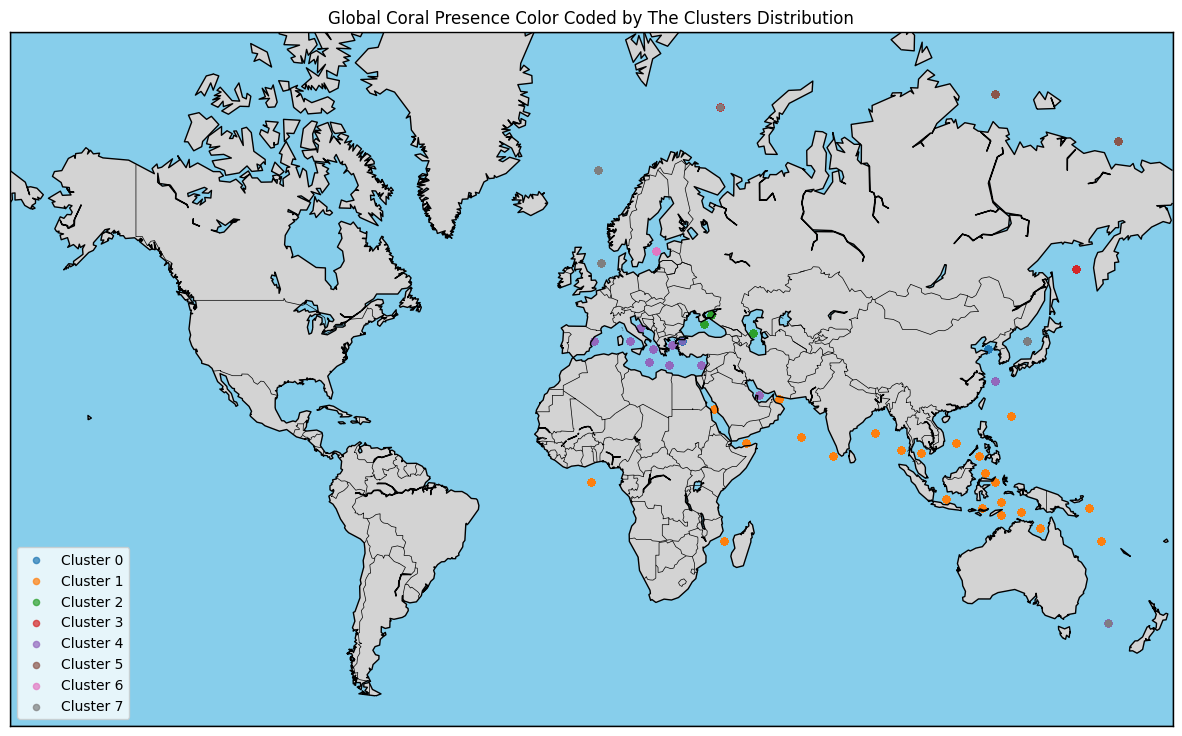

In [31]:
# This code is for plotting the coral present areas in a map and color code it by the clusters of the K-mean method
# Figure 9: Map View with corals present color-coded by the clusters of the k-mean.

# Initialize latitude, longitude, clusters, and coral presence for mapping
locations = df_corals[['latitude', 'longitude']]
locations['Cluster'] = standardized_df['Cluster']
locations['corals'] = df_corals['corals']

# Create a map to visualize coral presence color coded by clusters distribution
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc',
            llcrnrlat=-60, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='skyblue')
m.drawmapboundary(fill_color='skyblue')

# Plot the clusters
for cluster in range(standardized_df['Cluster'].nunique()):
    cluster_data = locations[locations['Cluster'] == cluster]
    x, y = m(cluster_data['longitude'].values, cluster_data['latitude'].values)
    m.scatter(x, y, label=f'Cluster {cluster}', alpha=0.7, s=20)

plt.title('Global Coral Presence Color Coded by The Clusters Distribution')
plt.legend()
plt.show()


## Figure 9: Map View with corals present color-coded by the k-mean clusters.

### Observations:

#### High Coral Presence in Cluster (1)

The mean coral presence for this cluster is higher than the others. Suggesting that regions in this cluster likely have better environmental conditions that are suitable for coral growth.

#### Moderate Coral Presence in Clusters (4 and 7)

Clusters 4 and 7 have a moderate mean coral presence, with variability in coral counts. This suggests transitional zones where environmental conditions might be less stable or near the tolerance thresholds for corals.

#### Low Coral Presence (0 and 3)

These clusters have the lowest mean coral presence and the smallest count. This indicates that regions in these clusters have harsher environmental conditions that are unsuitable for coral growth.


## Section 5: DBSCAN Clustering and Silhouette scoring:

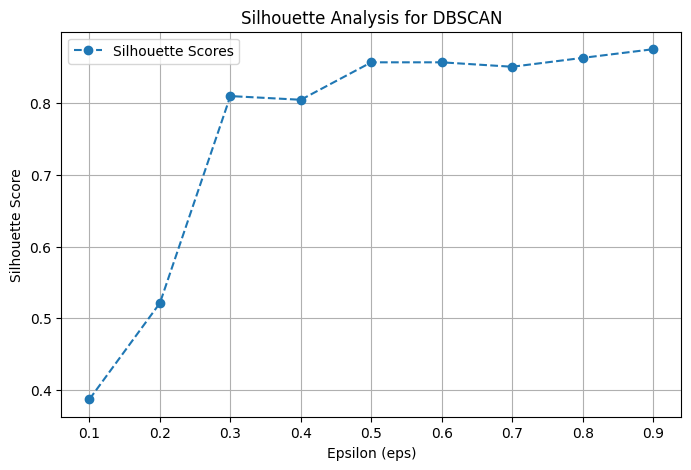

Optimal epsilon based on silhouette score is: 0.9


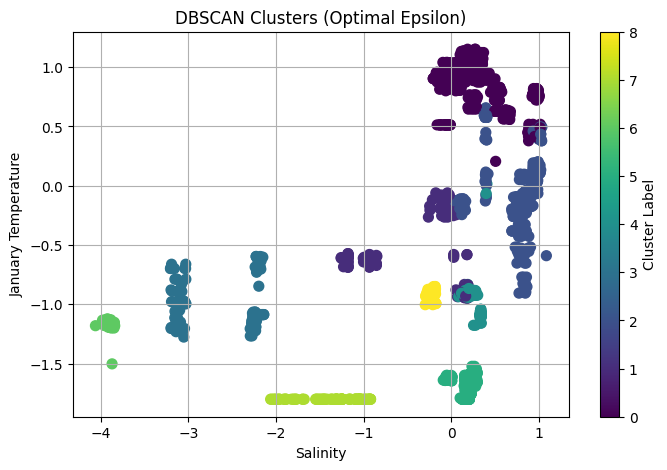

In [33]:
# This code performs DBSCAN clustering and silhouette scoring for the dataset.
# Figure 10: Silhouette analysis for DBSCAN
# Figure 11: DBSCAN Clusters (Optimal Epsilon)


# Define epsilon values
eps_values = np.arange(0.1, 1.0, 0.1)

# Initialize a list for storing silhouette scores for each epsilon value
silhouette_scores = []

# Ensure consistent data by resetting random state before shuffling or sampling
standardized_df = standardized_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Loop through each epsilon value to fit and evaluate DBSCAN
for eps in eps_values:
    # Initialize DBSCAN with the current epsilon and a minimum sample size of 5
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(standardized_df)

    # Silhouette score requires at least 2 clusters
    if len(set(dbscan_labels)) > 1:  # Ensure there are at least 2 clusters
        score = silhouette_score(standardized_df, dbscan_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Assign -1 for invalid configurations

# Plot silhouette scores for each epsilon value
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Scores')
plt.title('Silhouette Analysis for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Identify the epsilon value with the best silhouette score
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Optimal epsilon based on silhouette score is: {optimal_eps}")

# Apply DBSCAN using the optimal epsilon value
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(standardized_df)

# Add  labels for the clusters
standardized_df['DBSCAN_Cluster'] = dbscan_labels

# Plot the clustering results
plt.figure(figsize=(8, 5))
plt.scatter(
    standardized_df.iloc[:, 0],  # Salinity
    standardized_df.iloc[:, 1],  # January Temp
    c=dbscan_labels,
    cmap='viridis',
    s=50
)
plt.title('DBSCAN Clusters (Optimal Epsilon)')
plt.xlabel('Salinity')
plt.ylabel('January Temperature')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


## Figure 10: Silhouette analysis for DBSCAN

### Observations:

- The graph shows the silhouette scores for different epsilon values in DBSCAN.
- As the epsilon value increases, the silhouette score improves, reaching a peak around 𝜀 = 0.9 where the score stabilizes near 0.8.


## Figure 11: DBSCAN Clusters Based on the Optimal Epsilon

### Observations:
- The scatter plot shows the clustering results from DBSCAN using the optimal 𝜀 = 0.9.
- Some distinct clusters can be seen, with some groups of points tightly packed, while others are more spread out.
- Points grouped together represent similar environmental conditions ( salinity and temperature ranges).
- This method shows around 8 clusters, which is similar to the k-mean method.

## Section 6: Gaussian Mixture Model


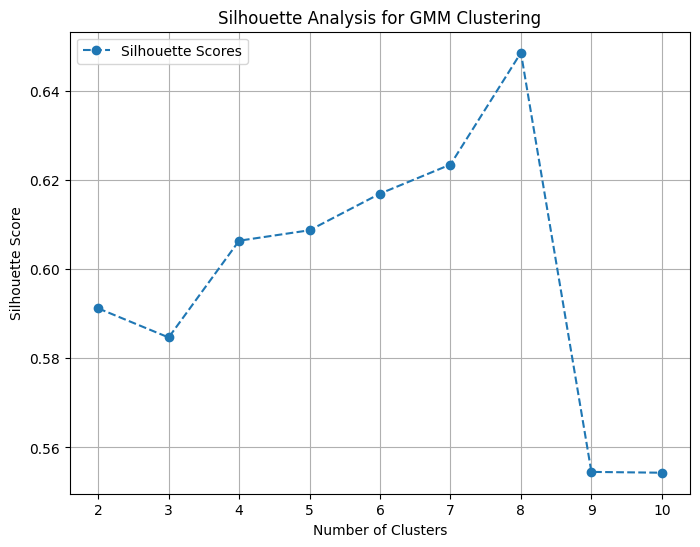

Optimal number of clusters based on silhouette score: 8


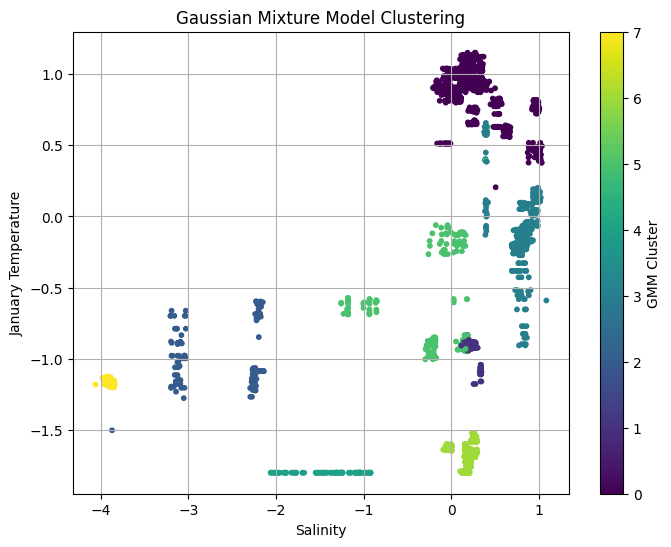

In [42]:
# This code performs Gaussian Mixture Model for clustering.
# Figure 12: Silhouette Analysis for GMM Clustering
# Figure 13: GMM clustering

# Initialize the range of clusters from 2 to 10.
range_clusters_gmm = range(2, 11)
# Initialize the silhouette score variables
silhouette_scores = []

# Evaluate silhouette score for each number of components
for n in range_clusters_gmm:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm_labels = gmm.fit_predict(standardized_df[['salinity', 'January_temp', 'June_temp']])
    score = silhouette_score(
        standardized_df[['salinity', 'January_temp', 'June_temp']], gmm_labels
    )
    silhouette_scores.append(score)

# Plot the silhouette scores for different components
plt.figure(figsize=(8, 6))
plt.plot(range_clusters_gmm, silhouette_scores, marker='o', linestyle='--', label='Silhouette Scores')
plt.title('Silhouette Analysis for GMM Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters_gmm)
plt.legend()
plt.grid(True)
plt.show()

# Fit the optimal GMM based on silhouette score
optimal_components = range_clusters_gmm[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_components}")

# Fit GMM with optimal number of clusters
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_labels = gmm.fit_predict(standardized_df[['salinity', 'January_temp', 'June_temp']])

# Add GMM cluster labels
standardized_df['GMM_Cluster'] = gmm_labels

# Plot the GMM clustering results using the first two features (salinity and January temperature)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    standardized_df['salinity'],
    standardized_df['January_temp'],
    c=standardized_df['GMM_Cluster'], cmap='viridis', s=10
)
plt.colorbar(scatter, label='GMM Cluster')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Salinity')
plt.ylabel('January Temperature')
plt.grid(True)
plt.show()


## Figure 12: Silhouette Analysis for GMM Clustering

### Observations:
The Silhouette Analysis suggests that the optimal cluster number is 8, with a Silhouette score of approximately 0.65.


## Figure 13: GMM clustering based on the Silhouette Analysis

The scatter plot shows the Gaussian Mixture Model (GMM) results applied to the normalized dataframe, where the data was clustered into eight clusters.

### Observations:
- The scatter plot shows the clustering results from GMM using the optimal clustering score (8).
- Some distinct clusters can be seen, with some groups of points tightly packed while others are more spread out.
- Points grouped represent similar environmental conditions ( salinity and temperature ranges).

Note: All three clustering methods have shown a similar number of clusters and distribution worldwide.

---

## Conclusion:
This notebook had three unsupervised clustering methods: the k-mean, DBSCAN, and Gaussian Mixture Model. The data was normalized before the clustering by the z-normalization method, where each feature is scaled to have a mean of 0 and a standard deviation of 1. Silhouette scoring was performed for each method to help decide the optimal number of clusters. Moreover, the Silhouette score shows that the optimal cluster number is 8 in all the methods. The more straightforward methods to perform and interpret were the k-mean and the Gaussian Mixture Model. In contrast, the DBSCAN was more advanced and confusing. All three methods show the same trends and number of clusters, adding confidence that coral presence can depend on eight environmental conditions that combine different salinities and temperatures. Overall, the results show that corals favor warmer and saltier environments.
On the other hand, clusters at higher latitudes, colder waters, and less saline conditions tend to have smaller quantities of corals. There were some anomalies in the clusters and some overlapping, which indicate that some corals can adapt to harsher environmental conditions. Geographically, the locations with the favored environmental conditions are in southeast Asia and the Pacific Islands. This is seen from the k-mean clusters map in Figure 9. Moreover, the map shows that the most prominent cluster is affected by the Great Barrier Reef, which is close to Australia, where most points are clustered.

---

## Section 7: Questions and Answers

### Which method did you like the most?

The two methods I liked the most are the k-mean and the Gaussian Mixture Model clusterings. For the K-mean clusterings, I liked it because it was the most straightforward to understand. It also gave a high silhouette score, which validated the clusters in the results. The Gaussian Mixture Model was also straight, forward with similar results that gave more certainty to the methods

### Which method did you like the least?

The DBSCAN is the least preferred because it was complicated to understand, and it used to change the result every time I ran it until I made it fixed. The results are confusing, and the clusters are more complex to interpret. Having said that, the number of clusters also agrees with the other two methods.

### How did you score these unsupervised models?

The scoring method used is the Silhouette score for all the clustering methods (K-mean, DBSCAN, GMM). In all methods, it gave a high score. Indicating well-defined clusters that have high cohesion and are well-separated

### Did the output align with your geologic understanding?
At first, I thought the clusters should be 2, which means a suitable environment for corals (present corals) and a bad environment for corals (absent corals). However, there seem to be eight different clusters based on the salinity and temperature. Latitude also played a role, as higher latitudes have less coral abundance.

### What did you want to learn more about?
I want to learn more about DBSCAN clustering as it is the most confusing method for me. Also, I have not explored the dimensionality reduction yet. I would like to see what the results would show.

### Did you pre-process your data?
 Yes, the data was overall clean. However, I had to normalize the data before applying the clustering methods. I applied the Z-score normalization method for the dataset, where each feature is scaled to have a mean of 0 and a standard deviation of 1. This ensures non-bias in clustering due to the outliers and large values.

### What was a decision you were most unsure about?
At first, it was hard to choose whether to assign the cluster number to 2 or leave it based on the silhouette score. After some trials, I decided to use the silhouette score to make this decision.